# Exporting question histogram data to a CSV file for D3 plots

I experimented with using D3 to plot data in a jekyll GitHub pages blog post.

In [1]:
# Set up to use local modules
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join('..')) # Add parent directory to path
sys.path.insert(0, module_path)

In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Local imports
from src import process
from src import plot

In [3]:
# Options
remove_q_names = False
save_to_csv = False

In [4]:
# Load data
data, ests = process.load_and_process_results()
ests_copy = ests.copy()  # For modifying ests

In [5]:
# Just the predictions extracted from the blind mode dataset
ests.head()

,@1.WillVladimirPutinbePresidentofRussia,@2.WillUkrainecontrolthecityofSevastopol,@3.WillUkrainecontrolthecityofLuhansk,@4.WillUkrainecontrolthecityofZaporizhzhia,@5.WilltherebealastingceasefireintheRussiaUkrainewar,@6.WilltheKerchBridgebedestroyedsuchthatnovehiclecanpassoverit,@7.WillanissueinvolvinganuclearpowerplantinUkrainerequireevacuat,@8.Willanuclearweaponbedetonatedincludingtestsandaccidents,@9.Willanuclearweaponbeusedinwarienotatestoraccidentandkillatlea,@10.WillChinalaunchafullscaleinvasionofTaiwan,...,@41.WillanimagemodelwinScottAlexander’sbetoncompositionalitytoEd,@42.WillCOVIDkillatleast50asmanypeoplein2023asitdidin2022,@43.WillanewversionofCOVIDbesubstantiallyabletoescapeOmicronvacc,@44.WillGoogleMetaAmazonorApplereleaseanARheadset,@45.WillanordinarypersonbeabletotakeaselfdrivingtaxifromOaklandS,@46.WillaculturedmeatproductbeavailableinatleastoneUSstoreorrest,@47.Willasuccessfuldeepfakeattemptcausingrealdamagemakethefrontp,@48.WillWHOdeclareanewGlobalHealthEmergency,@49.WillAIwinaprogrammingcompetition,@50.WillsomeonereleasequotDALLEbutforvideosquot
0,99.0,1.0,1.0,1.0,99.0,1.0,1.0,1.0,1.0,1.0,...,50.0,1.0,99.0,99.0,1.0,1.0,1.0,1.0,99.0,99.0
1,99.0,1.0,50.0,50.0,85.0,15.0,30.0,15.0,15.0,2.0,...,98.0,2.0,97.0,50.0,50.0,50.0,4.0,15.0,45.0,55.0
2,99.0,1.0,50.0,33.0,1.0,20.0,1.0,1.0,1.0,1.0,...,60.0,25.0,25.0,25.0,5.0,1.0,10.0,3.0,5.0,10.0
3,99.0,1.0,1.0,1.0,50.0,10.0,25.0,1.0,1.0,5.0,...,50.0,99.0,99.0,1.0,1.0,10.0,1.0,90.0,15.0,1.0
4,99.0,30.0,30.0,75.0,40.0,80.0,40.0,10.0,10.0,20.0,...,90.0,30.0,40.0,60.0,70.0,60.0,70.0,20.0,90.0,70.0


In [6]:
# Strip the column names of the @ and the .*
if remove_q_names:
    # Replace questions' names with q1, q2, etc.
    ests_copy.columns = ests_copy.columns.str.replace("@", "q")
    ests_copy.columns = ests_copy.columns.str.replace("\..*", "", regex=True)
    ests_copy.head()

In [7]:
# Create histogram bins
nBins = 11
bin_edges = np.linspace(0, 100, nBins)

# Create a dataframe to hold the bin heights for each column
bin_heights = pd.DataFrame(index=bin_edges[:-1], columns=ests_copy.columns)

# Shift the index values to the center of the bins
bin_heights.index = bin_heights.index + (bin_edges[1] - bin_edges[0]) / 2

# Loop over the columns and compute the bin heights, normalized to percentage
for col in ests_copy.columns:
    bin_heights[col] = (
        np.histogram(ests_copy[col], bins=bin_edges)[0] / len(ests_copy[col]) * 100
    )

bin_heights.head()

,@1.WillVladimirPutinbePresidentofRussia,@2.WillUkrainecontrolthecityofSevastopol,@3.WillUkrainecontrolthecityofLuhansk,@4.WillUkrainecontrolthecityofZaporizhzhia,@5.WilltherebealastingceasefireintheRussiaUkrainewar,@6.WilltheKerchBridgebedestroyedsuchthatnovehiclecanpassoverit,@7.WillanissueinvolvinganuclearpowerplantinUkrainerequireevacuat,@8.Willanuclearweaponbedetonatedincludingtestsandaccidents,@9.Willanuclearweaponbeusedinwarienotatestoraccidentandkillatlea,@10.WillChinalaunchafullscaleinvasionofTaiwan,...,@41.WillanimagemodelwinScottAlexander’sbetoncompositionalitytoEd,@42.WillCOVIDkillatleast50asmanypeoplein2023asitdidin2022,@43.WillanewversionofCOVIDbesubstantiallyabletoescapeOmicronvacc,@44.WillGoogleMetaAmazonorApplereleaseanARheadset,@45.WillanordinarypersonbeabletotakeaselfdrivingtaxifromOaklandS,@46.WillaculturedmeatproductbeavailableinatleastoneUSstoreorrest,@47.Willasuccessfuldeepfakeattemptcausingrealdamagemakethefrontp,@48.WillWHOdeclareanewGlobalHealthEmergency,@49.WillAIwinaprogrammingcompetition,@50.WillsomeonereleasequotDALLEbutforvideosquot
5.0,0.880121,16.449165,5.948407,1.638847,5.250379,7.647951,15.690440,39.605463,76.600910,52.200303,...,1.729894,4.977238,2.913505,4.097117,18.118361,10.500759,8.437026,10.925645,10.713202,7.040971
15.0,0.576631,18.907436,10.197269,1.790592,10.257967,14.749621,24.188164,24.430956,14.719272,26.858877,...,2.579666,8.012140,7.617602,8.072838,18.846737,14.688923,14.567527,19.210926,12.898331,10.804249
25.0,1.638847,15.265554,12.959029,3.156297,16.388467,18.907436,20.667678,12.109256,3.854325,10.045524,...,5.068285,12.443096,13.444613,11.441578,17.511381,13.869499,14.112291,19.393020,13.414264,10.227618
35.0,1.911988,8.042489,11.441578,4.188164,15.569044,13.110774,10.500759,6.100152,1.456753,4.339909,...,5.007587,12.321700,13.444613,11.047041,12.352049,10.622155,10.652504,13.869499,10.166920,8.528073
45.0,1.820941,4.916540,8.649469,4.825493,10.045524,8.163885,5.705615,4.097117,0.849772,1.669196,...,6.282246,7.951442,9.377845,7.738998,7.374810,6.798179,8.103187,8.376328,7.101669,5.978756


Text(0.5, 0, 'Prediction (%)')

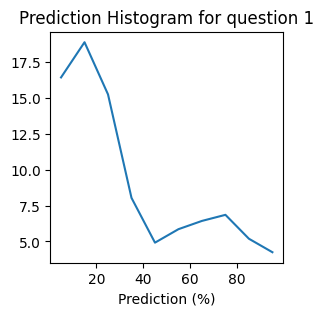

In [8]:
# Plot an example question histogram
q_to_plot = 1
fig, ax = plt.subplots(figsize=(3, 3))
ax.plot(bin_heights.index, bin_heights.iloc[:, q_to_plot])
ax.set_title("Prediction Histogram for question " + str(q_to_plot))
ax.set_xlabel("Prediction (%)")

In [9]:
# Save to csv
if save_to_csv:
    # Name the index "x"
    bin_heights.index.name = "x"
    bin_heights.to_csv(os.path.join(process.PROCESSED_DATA_FOLDER, "2023blindmode_predictions_histogram3.csv") )
else:
    print("Not saving to csv")

Not saving to csv
